Dataset Loaded Successfully!
                         Transaction_ID      Account_Number  Transaction_Date  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  IUPM04409079772781  05-11-2023 15:54   
1  23b8c1e9-3924-46de-beb1-3b9046685257  BLAT22216107051843  21-04-2024 22:21   
2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9  UTXA55295806601382  17-07-2023 13:25   
3  972a8469-1641-4f82-8b9d-2434e465e150  XICF70493862044851  27-06-2023 16:09   
4  17fc695a-07a0-4a6e-8822-e8f36c031199  KOSW19711121259020  26-03-2024 23:45   

   Transaction_Amount                Merchant_Name Transaction_Type  \
0             3198.94                Houston Group            Debit   
1              129.93            Anderson-Phillips           Credit   
2             1378.77                 Jensen Group           Credit   
3             1119.94  Nelson, Gomez and Rodriguez           Credit   
4             3683.67               Caldwell Group           Credit   

        Category          City Country   Payment_Method  

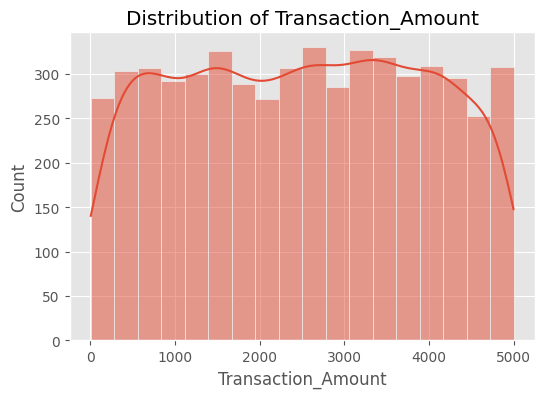

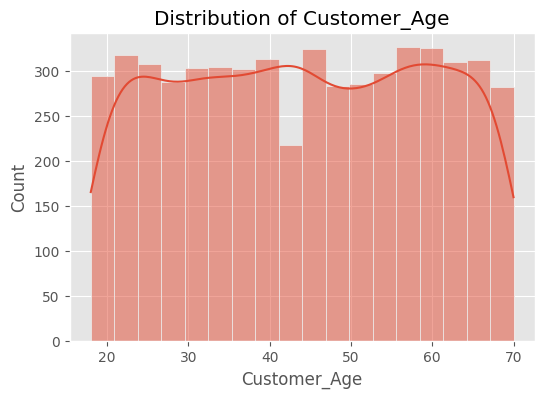

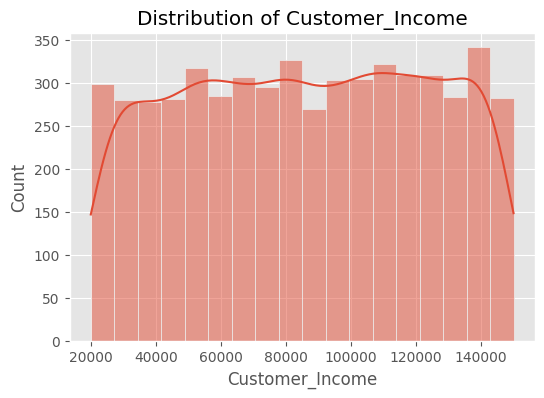

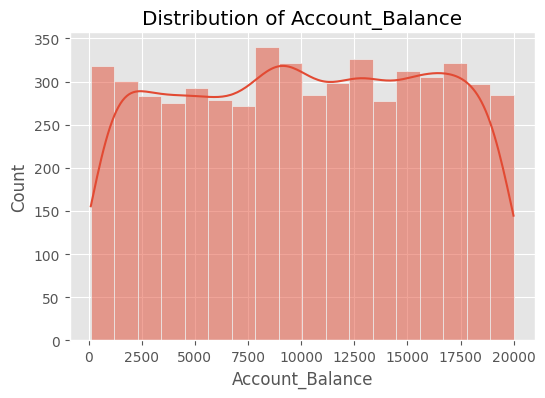

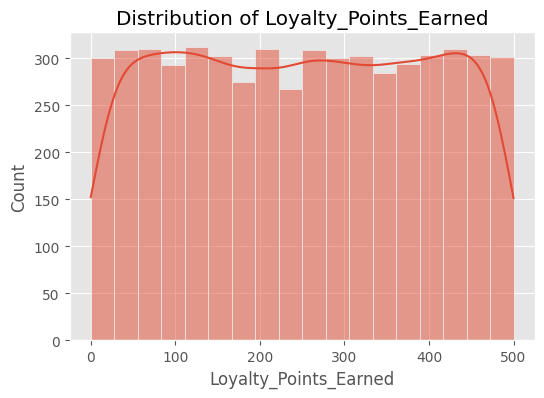

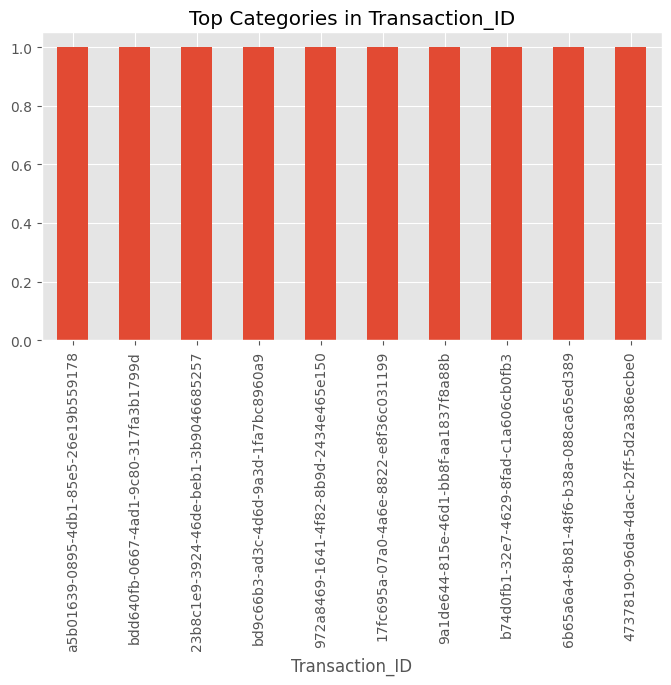

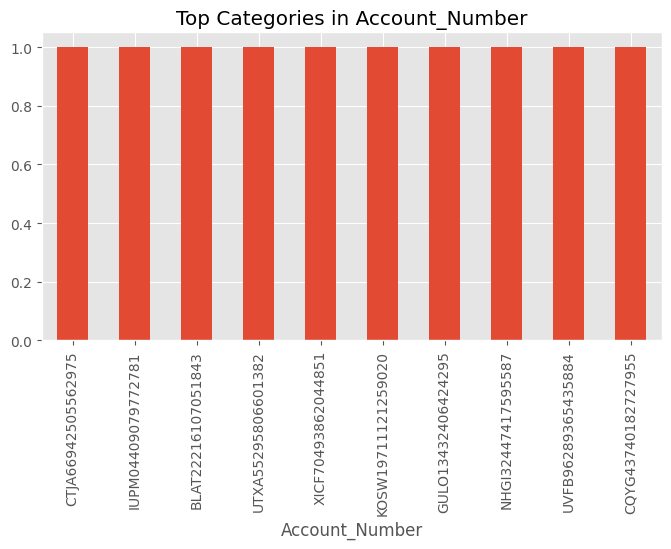

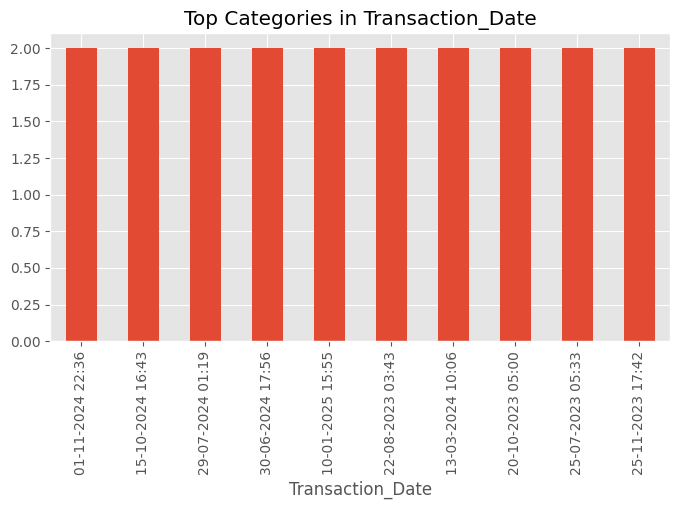

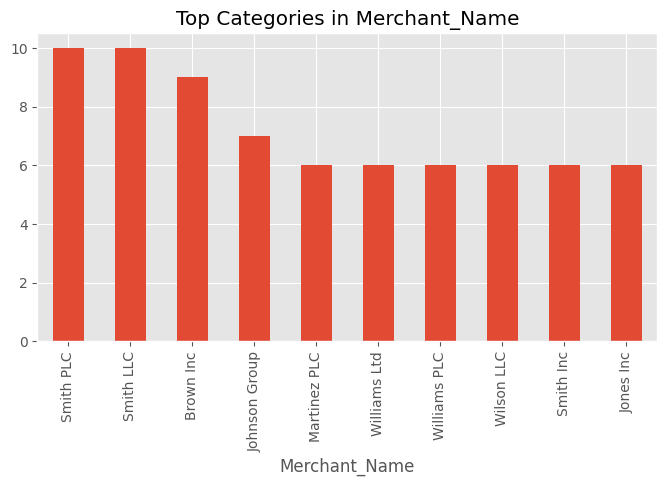

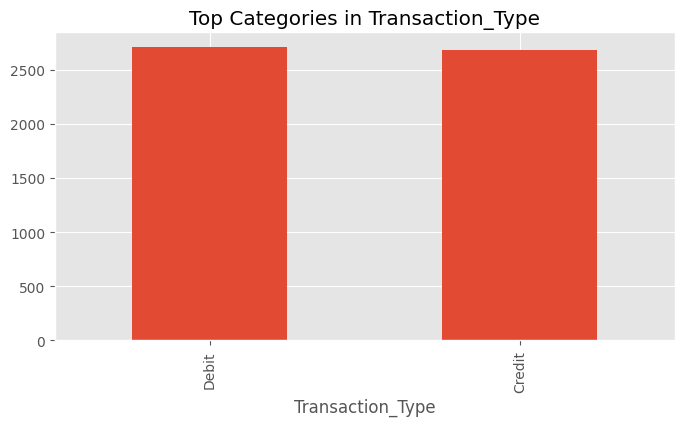

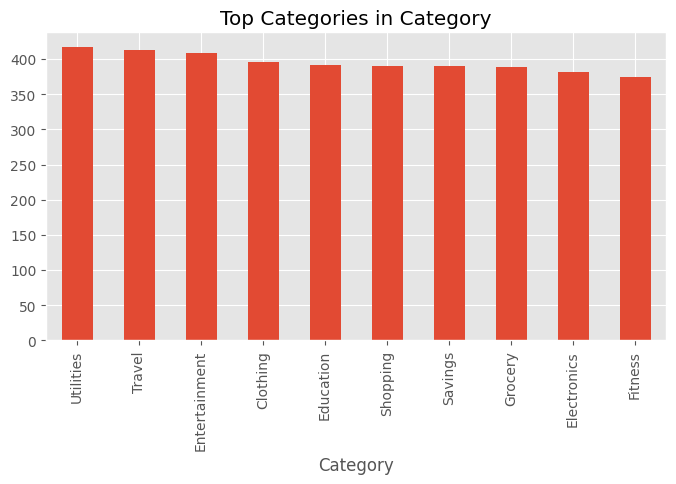

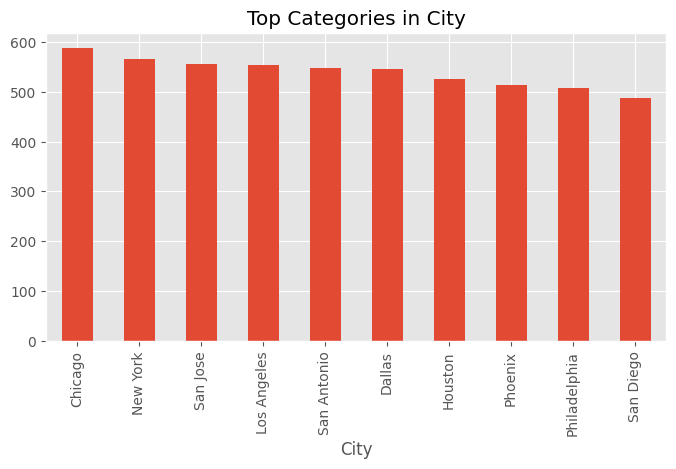

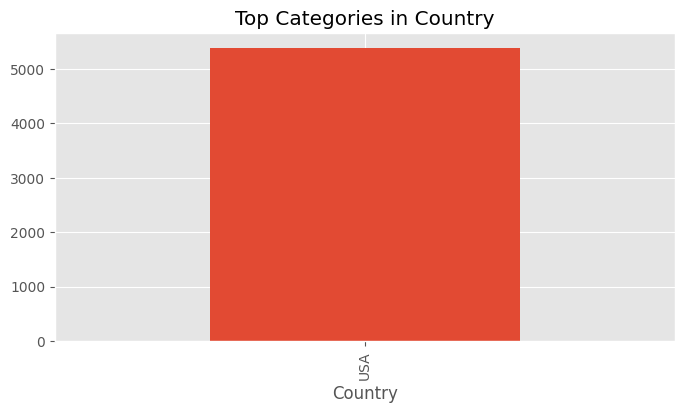

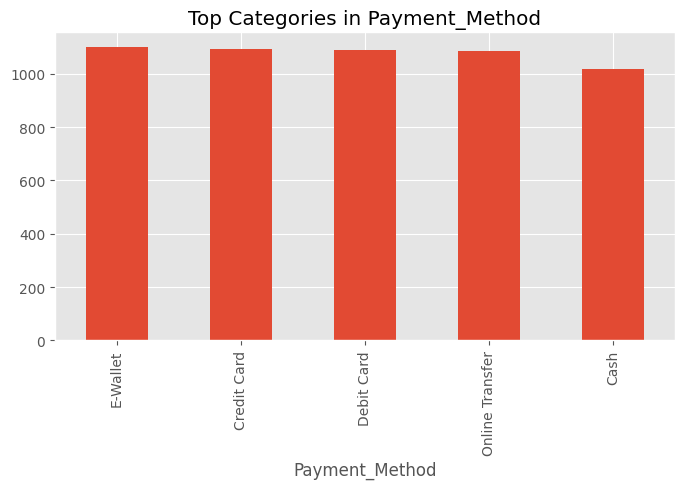

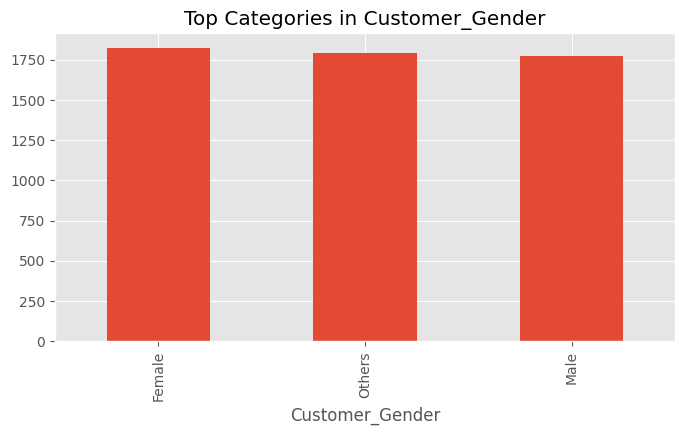

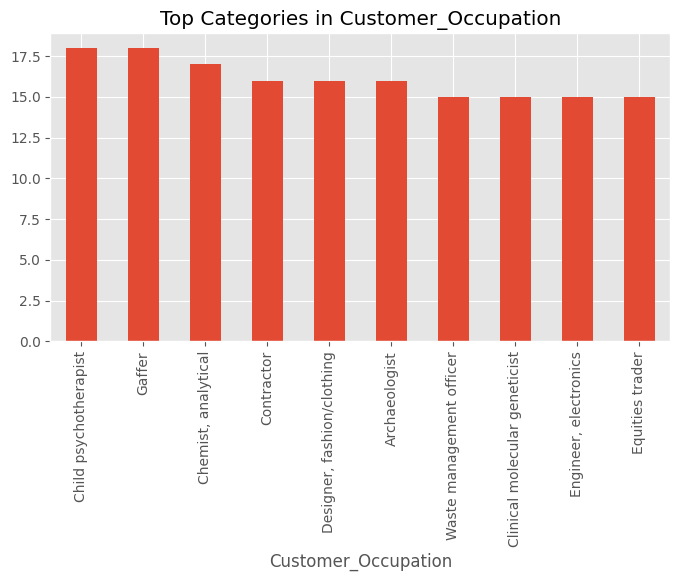

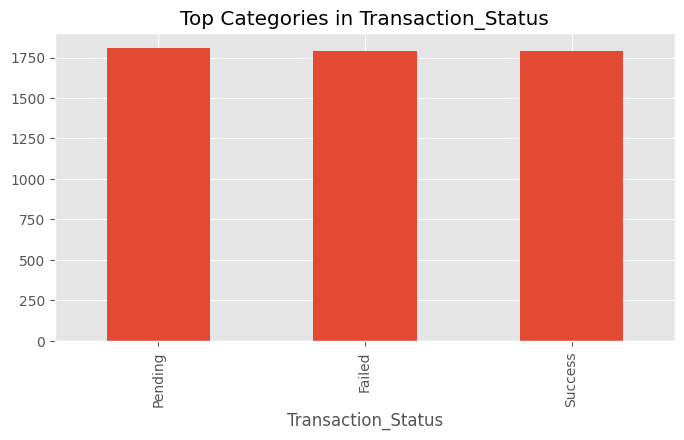

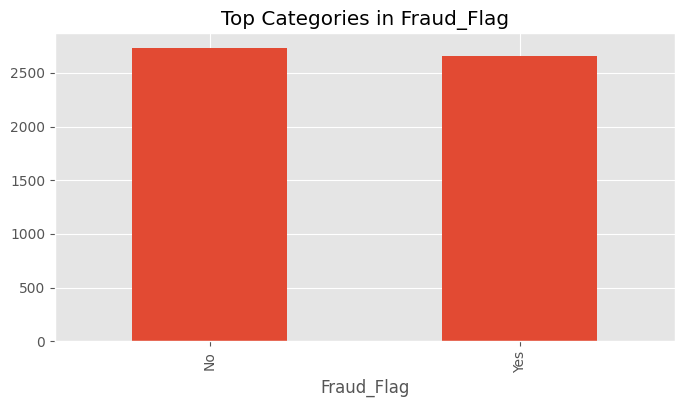

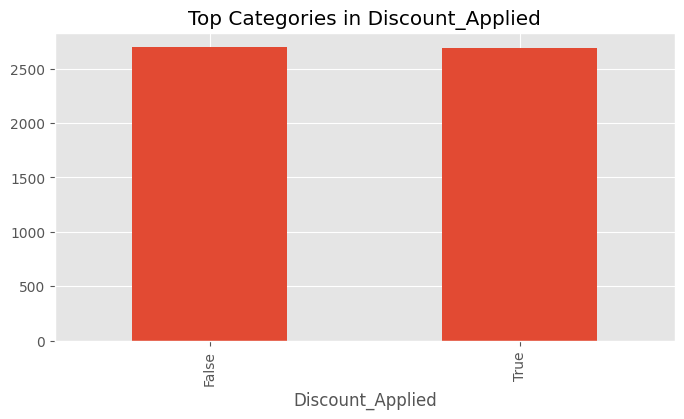

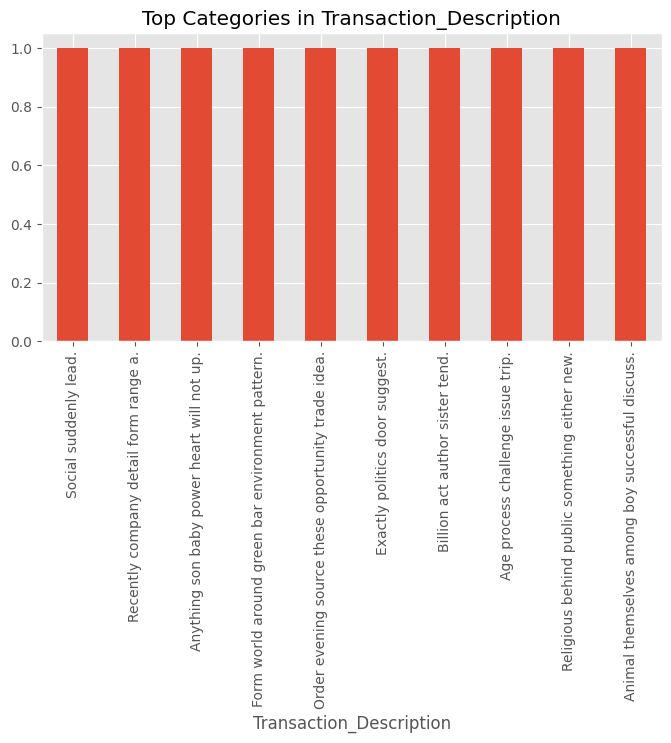

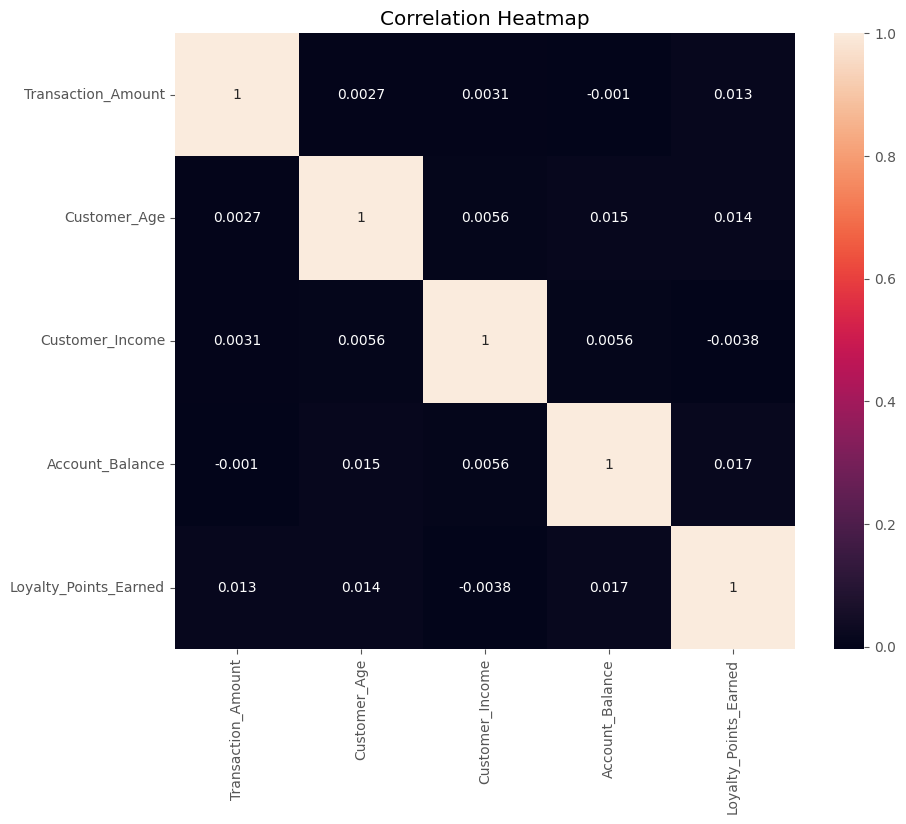

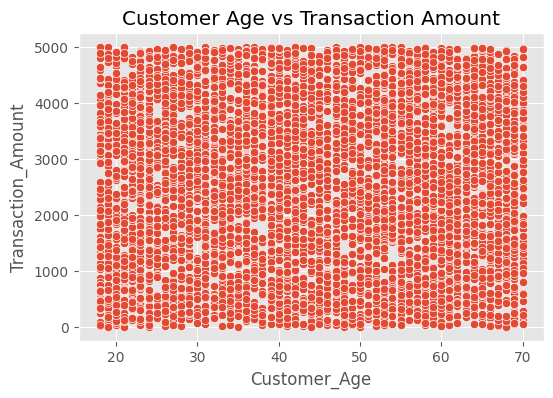


Revenue by Country:
Country
USA    13497554.54
Name: Transaction_Amount, dtype: float64


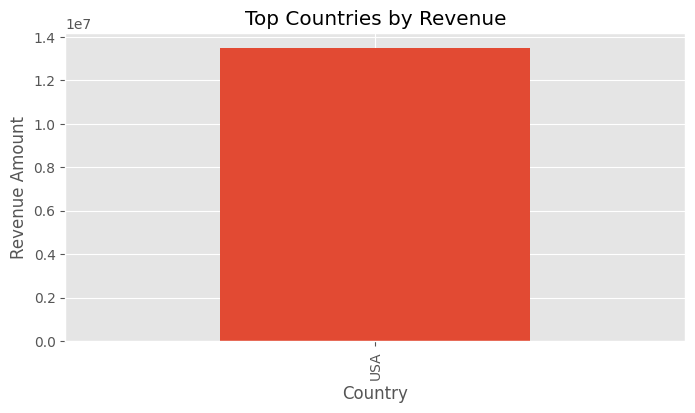


Sales by Category:
Category
Utilities        1034864.54
Entertainment    1018851.08
Travel           1018769.19
Clothing         1002296.46
Education         976638.69
Name: Transaction_Amount, dtype: float64


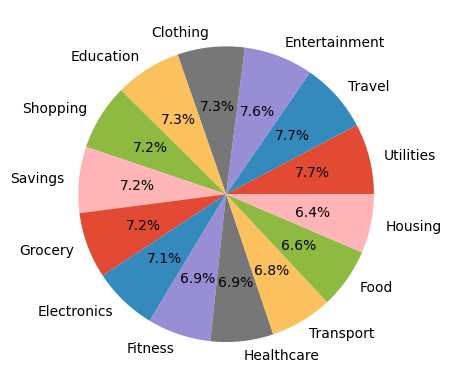


--- Automated Insights ---
Highest revenue category: Utilities
Highest revenue country: USA
Average customer age: 44.02

Insight Example:
Focus marketing in USA and expand product category Utilities to maximize revenue growth.

Files Saved Successfully!


In [8]:
# ==========================================
# BUSINESS DATA ANALYSIS PROJECT TEMPLATE
# Dataset: us-insurance.csv
# ==========================================

# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DISPLAY SETTINGS
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# ------------------------------------------
# 1. LOAD DATA
# ------------------------------------------

df = pd.read_csv("us-insurance.csv")
print("Dataset Loaded Successfully!")
print(df.head())
print(df.shape)

# ------------------------------------------
# 2. BASIC DATA OVERVIEW
# ------------------------------------------

print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Summary Statistics ---")
print(df.describe(include='all'))

# ------------------------------------------
# 3. CHECK FOR MISSING VALUES
# ------------------------------------------

print("\n--- Missing Values ---")
print(df.isnull().sum())


# ------------------------------------------
# 4. SEPARATE NUMERICAL & CATEGORICAL DATA
# ------------------------------------------

num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object','bool']).columns

print("\nNumeric Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))

# ------------------------------------------
# 5. UNIVARIATE ANALYSIS
# ------------------------------------------

# HISTOGRAMS FOR NUMERIC COLUMNS
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# BAR CHART FOR CATEGORICAL VARIABLES
for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top Categories in {col}")
    plt.show()

# ------------------------------------------
# 6. CORRELATION ANALYSIS
# ------------------------------------------

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

# ------------------------------------------
# 7. BIVARIATE ANALYSIS
# Example: Relationship between Age & Transaction Amount
# ------------------------------------------

if "Customer_Age" in df.columns and "Transaction_Amount" in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x="Customer_Age", y="Transaction_Amount")
    plt.title("Customer Age vs Transaction Amount")
    plt.show()

# ------------------------------------------
# 8. GROUP & SEGMENT ANALYSIS (Business Insight)
# ------------------------------------------

# Total transaction amount by country
country_revenue = df.groupby("Country")["Transaction_Amount"].sum().sort_values(ascending=False)
print("\nRevenue by Country:")
print(country_revenue.head())

country_revenue.head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top Countries by Revenue")
plt.ylabel("Revenue Amount")
plt.show()

# Revenue by category
category_sales = df.groupby("Category")["Transaction_Amount"].sum().sort_values(ascending=False)
print("\nSales by Category:")
print(category_sales.head())

category_counts = df['Category'].value_counts()
plt.pie(category_counts.values, labels=category_counts.index, autopct ='%1.1f%%')
plt.show()
# ------------------------------------------
# 9. AUTOMATED INSIGHTS
# ------------------------------------------

print("\n--- Automated Insights ---")
print("Highest revenue category:", category_sales.idxmax())
print("Highest revenue country:", country_revenue.idxmax())
print("Average customer age:", round(df["Customer_Age"].mean(), 2))

print("\nInsight Example:")
print("Focus marketing in", country_revenue.idxmax(),
      "and expand product category", category_sales.idxmax(),
      "to maximize revenue growth.")

# ------------------------------------------
# 10. EXPORT ANALYZED OUTPUT
# ------------------------------------------

df.to_csv("cleaned_dataset.csv", index=False)
country_revenue.to_csv("revenue_by_country.csv")
category_sales.to_csv("sales_by_category.csv")

print("\nFiles Saved Successfully!")

